# Demo of Gated Recurrent Unit

In [87]:
# Standard Math / Data libraries
import numpy as np
import pandas as pd

# Data Scrape Package
import pandas_datareader.data as web

# Plotting package
import matplotlib.pyplot as plt
# Scaling Package
from sklearn.preprocessing import MinMaxScaler

# Keras Network @ https://www.tensorflow.org/guide/keras/gru
import tensorflow as tf # version tensorflow==2.4.0
from tensorflow import keras
from keras import layers
#from tensorflow.keras import layers

# Set Random seed
import random
random.seed(2505)

In [88]:
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#import data
#url = "https://raw.githubusercontent.com/jackty9/Handling_Imbalanced_Data_in_Python/master/bank-full-encoded.csv"
df = pd.read_csv("/home/rehan/Downloads/panda_research/data/combined_labled_k6.csv")



In [84]:
# Separating the independent variables from dependent variables
X = df.iloc[:,1:7]
print(X)

       joint_effort[0]  joint_effort[1]  joint_effort[2]  joint_effort[3]  \
0             1.050352         0.036084         0.153670        -0.208722   
1             1.040706         0.052485         0.160204        -0.204533   
2             1.070528         0.033901         0.198342        -0.208156   
3             1.078726         0.032952         0.203791        -0.208763   
4             1.046257         0.048101         0.215115        -0.205263   
...                ...              ...              ...              ...   
35833         2.197765         0.698508        -0.035440        -0.127779   
35834         2.181485         0.686810        -0.030687        -0.127087   
35835         2.187751         0.723994        -0.046943        -0.124015   
35836         2.173231         0.764835        -0.166300        -0.116387   
35837         2.213714         0.708890        -0.019681        -0.124139   

       joint_effort[4]  joint_effort[5]  
0            -0.226335         0.

In [89]:
# Separating the independent variables from dependent variables

y = df["cluster"]

print(y)

0        0
1        0
2        0
3        0
4        0
        ..
35833    0
35834    0
35835    0
35836    0
35837    0
Name: cluster, Length: 35838, dtype: int64


In [90]:
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.001)

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))


Before oversampling:  Counter({0: 32135, 2: 2054, 1: 1613})
After oversampling:  Counter({0: 32135, 2: 32135, 1: 32135})


# Cleaning the Data 

In [91]:
# # Daily Data on Gold.
# tick = 'GC=F'
# #gold = web.get_data_yahoo(tick,'12/27/2015',interval='d')
# data= pd.read_csv("/home/rehan/Downloads/panda_research/data/combined_labled_k6.csv")
data=df

In [92]:
gold= data.iloc[: , 1:7]
gold

,joint_effort[0],joint_effort[1],joint_effort[2],joint_effort[3],joint_effort[4],joint_effort[5]
0,1.050352,0.036084,0.153670,-0.208722,-0.226335,0.071900
1,1.040706,0.052485,0.160204,-0.204533,-0.222889,0.070273
2,1.070528,0.033901,0.198342,-0.208156,-0.228432,0.070408
3,1.078726,0.032952,0.203791,-0.208763,-0.228608,0.071877
4,1.046257,0.048101,0.215115,-0.205263,-0.223011,0.071184
...,...,...,...,...,...,...
35833,2.197765,0.698508,-0.035440,-0.127779,-0.357269,-0.376626
35834,2.181485,0.686810,-0.030687,-0.127087,-0.355794,-0.378369
35835,2.187751,0.723994,-0.046943,-0.124015,-0.355552,-0.374260
35836,2.173231,0.764835,-0.166300,-0.116387,-0.359594,-0.378620


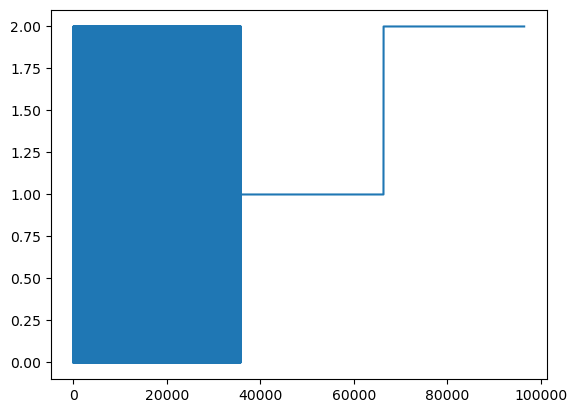

In [93]:
plt.plot(y_train_SMOTE)

In [94]:
gold.values

array([[ 1.05035197,  0.03608361,  0.15366994, -0.20872176, -0.22633529,
         0.07190013],
       [ 1.04070593,  0.05248472,  0.16020391, -0.20453307, -0.22288895,
         0.07027318],
       [ 1.07052848,  0.03390063,  0.19834174, -0.20815593, -0.22843161,
         0.07040757],
       ...,
       [ 2.18775072,  0.72399379, -0.04694298, -0.1240152 , -0.3555519 ,
        -0.3742596 ],
       [ 2.17323085,  0.76483473, -0.16630029, -0.11638658, -0.3595942 ,
        -0.37862044],
       [ 2.21371423,  0.70888995, -0.01968097, -0.12413878, -0.36091259,
        -0.37732746]])

In [95]:
#returns = gold['cluster'].pct_change() # Used for univariate example.
#returns = data['cluster']
returns=y_train_SMOTE
column_names = gold.columns
#x = gold.values #returns a numpy array
x=X_train_SMOTE.values
min_max_scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [96]:
df.head()

,0,1,2,3,4,5
0,0.546206,0.222000,0.473600,0.306486,0.389726,0.854508
1,0.412224,0.719260,0.629318,0.670218,0.601477,0.299303
2,0.554987,0.201558,0.393622,0.258973,0.387286,0.859602
3,0.538990,0.707426,0.590326,0.491733,0.563154,0.217768
4,0.341938,0.524236,0.542843,0.407172,0.628472,0.772602


In [97]:
pct_c_gold = df
df

,0,1,2,3,4,5
0,0.546206,0.222000,0.473600,0.306486,0.389726,0.854508
1,0.412224,0.719260,0.629318,0.670218,0.601477,0.299303
2,0.554987,0.201558,0.393622,0.258973,0.387286,0.859602
3,0.538990,0.707426,0.590326,0.491733,0.563154,0.217768
4,0.341938,0.524236,0.542843,0.407172,0.628472,0.772602
...,...,...,...,...,...,...
96400,0.488571,0.733223,0.811767,0.516379,0.611998,0.127002
96401,0.388234,0.737300,0.613963,0.486594,0.669199,0.150726
96402,0.458065,0.806377,0.646847,0.555463,0.661725,0.075432
96403,0.682981,0.694577,0.565477,0.471728,0.447854,0.124412


In [98]:
pct_c_gold.columns = column_names
pct_c_gold.columns

Index(['joint_effort[0]', 'joint_effort[1]', 'joint_effort[2]',
       'joint_effort[3]', 'joint_effort[4]', 'joint_effort[5]'],
      dtype='object')

In [99]:
pct_c_gold

,joint_effort[0],joint_effort[1],joint_effort[2],joint_effort[3],joint_effort[4],joint_effort[5]
0,0.546206,0.222000,0.473600,0.306486,0.389726,0.854508
1,0.412224,0.719260,0.629318,0.670218,0.601477,0.299303
2,0.554987,0.201558,0.393622,0.258973,0.387286,0.859602
3,0.538990,0.707426,0.590326,0.491733,0.563154,0.217768
4,0.341938,0.524236,0.542843,0.407172,0.628472,0.772602
...,...,...,...,...,...,...
96400,0.488571,0.733223,0.811767,0.516379,0.611998,0.127002
96401,0.388234,0.737300,0.613963,0.486594,0.669199,0.150726
96402,0.458065,0.806377,0.646847,0.555463,0.661725,0.075432
96403,0.682981,0.694577,0.565477,0.471728,0.447854,0.124412


# Univariate Forecasting (GRU)

In [100]:
#returns=returns+1
returns

0        0
1        0
2        0
3        0
4        0
        ..
96400    2
96401    2
96402    2
96403    2
96404    2
Name: cluster, Length: 96405, dtype: int64

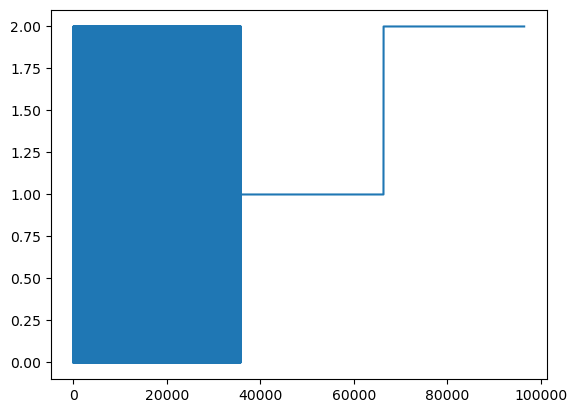

In [101]:
plt.plot(returns)

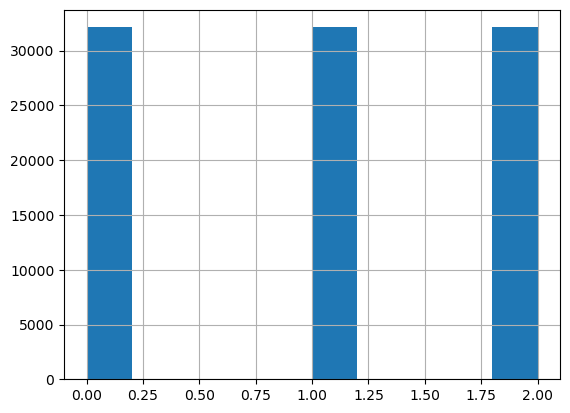

In [102]:
returns.hist()

In [103]:
# Flatten this matrix down.
npa = returns.values[1:].reshape(-1,1) # Python is smart to recognize whatever dimension you need by using this parameter
print(len(npa))
# # Let's scale the data -- this helps avoid the exploding gradient issue
#scale = MinMaxScaler(feature_range=(0,1)) # This is by default.
#npa = scale.fit_transform(npa)
#print(len(npa))

96404


In [104]:
# Need the data to be in the form [sample, time steps, features (dimension of each element)]
samples = 10 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X = [] # X array
Y = [] # Y array
for i in range(npa.shape[0] - samples):
    X.append(npa[i:i+samples]) # Independent Samples
    Y.append(npa[i+samples][0]) # Dependent Samples
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  10 :  [array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])]
Testing Data: Length is  1 :  [0]


In [105]:
#Reshape the data so that the inputs will be acceptable to the model.
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

threshold = round(0.9 * X.shape[0])
print('Threshold is', threshold)

Dimensions of X (96394, 10, 1) Dimensions of Y (96394,)
Threshold is 86755


In [106]:
# Let's build the GRU
model = keras.Sequential()

# Add a GRU layer with 3 units.
model.add(layers.GRU(10,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     input_shape=(X.shape[1], X.shape[2])))
# Add a dropout layer (penalizing more complex models) -- prevents overfitting
model.add(layers.Dropout(rate=0.2))


# Add a Dense layer with 1 units (Since we are doing a regression task.
model.add(layers.Dense(1))

# Evaluating loss function of MSE using the adam optimizer.
model.compile(loss='mean_squared_error', optimizer = 'adam')

# Print out architecture.
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 10)                390       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Fitting the data
history = model.fit(X[:threshold],
                    Y[:threshold],
                    shuffle = False, # Since this is time series data
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1) # Verbose outputs data

Epoch 1/100


2022-09-21 17:01:59.450786: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-09-21 17:01:59.549443: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1517/1517 [==============================] - 5s 2ms/step - loss: 0.1476 - val_loss: 0.0016
Epoch 2/100
1517/1517 [==============================] - 3s 2ms/step - loss: 0.1461 - val_loss: 0.0016
Epoch 3/100
1517/1517 [==============================] - 3s 2ms/step - loss: 0.1430 - val_loss: 0.0028
Epoch 4/100
1517/1517 [==============================] - 4s 2ms/step - loss: 0.1405 - val_loss: 6.4688e-04
Epoch 5/100
1517/1517 [==============================] - 4s 2ms/step - loss: 0.1386 - val_loss: 5.8856e-04
Epoch 6/100
1517/1517 [==============================] - 4s 2ms/step - loss: 0.1381 - val_loss: 4.5926e-04
Epoch 7/100
1517/1517 [==============================] - 4s 2ms/step - loss: 0.1379 - val_loss: 0.0014
Epoch 8/100
1517/1517 [==============================] - 4s 2ms/step - loss: 0.1378 - val_loss: 2.0954e-05
Epoch 9/100
1517/1517 [==============================] - 3s 2ms/step - loss: 0.1379 - val_loss: 0.0014
Epoch 10/100
1517/1517 [==============================] - 3s 2ms/step

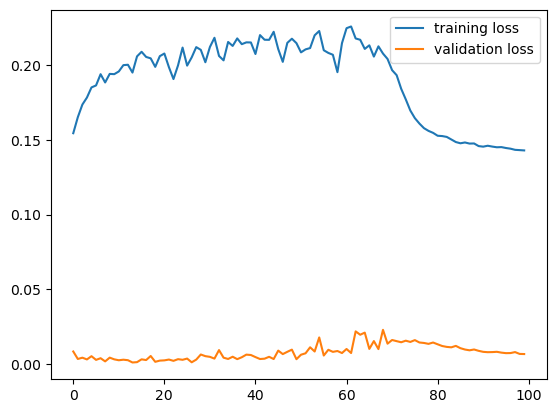

In [107]:
# Plotting the loss iteration
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()
# Note:
# if training loss >> validation loss -> Underfitting
# if training loss << validation loss -> Overfitting (i.e model is smart enough to have mapped the entire dataset..)
# Several ways to address overfitting:
# Reduce complexity of model (hidden layers, neurons, parameters input etc)
# Add dropout and tune rate
# More data :)

# Multi-Step Forecast

In [108]:
# Predictions using the 'sliding/rolling window approach'
# Multi step forecast.
# Using self predictions for making future predictions
print(threshold)
true_Y = Y[threshold:]
pred_Y = []
print('Number of Forecasts to do: ',Y.shape[0] - round(Y.shape[0]*0.9))
latest_input = X[threshold-1:threshold]

for i in range(Y.shape[0] - round(Y.shape[0]*0.9) ):
    # Prediction
    p = model.predict(latest_input.reshape(1,X.shape[1],1))[0,0]
    
    # Update predictions
    pred_Y.append(p)
    latest_input = np.append(X[threshold][1:], p)

86755
Number of Forecasts to do:  9639
1/1 [==============================] - 0s 25ms/step


In [41]:
print(X)

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[2]
  [2]
  [2]
  ...
  [2]
  [2]
  [2]]

 [[2]
  [2]
  [2]
  ...
  [2]
  [2]
  [2]]

 [[2]
  [2]
  [2]
  ...
  [2]
  [2]
  [2]]]


In [109]:
print(Y)

[0 0 0 ... 2 2 2]


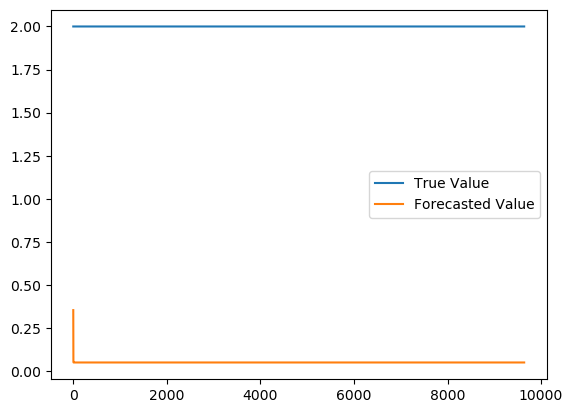

In [110]:
plt.plot(true_Y, label = 'True Value')
plt.plot(pred_Y, label = 'Forecasted Value')
plt.legend()
# Model just copied the same value over and over again. Hence, model is not very robust.
# It's just predicting the mean.

In [44]:
pct_c_gold

,joint_effort[0],joint_effort[1],joint_effort[2],joint_effort[3],joint_effort[4],joint_effort[5]
0,0.295934,0.544765,0.507916,0.401488,0.620234,0.783117
1,0.566640,0.713424,0.590666,0.473645,0.513838,0.222272
2,0.439636,0.675946,0.563838,0.547882,0.569159,0.263392
3,0.512241,0.209307,0.369542,0.275212,0.394883,0.882157
4,0.576071,0.714151,0.540147,0.480143,0.503573,0.219990
...,...,...,...,...,...,...
67402,0.672152,0.716839,0.519762,0.475250,0.429800,0.145147
67403,0.499659,0.196099,0.358934,0.278342,0.383103,0.910500
67404,0.655683,0.835830,0.495638,0.595817,0.428569,0.136855
67405,0.531854,0.738680,0.525528,0.512943,0.525014,0.163016


# Multi-Variate Forecasting

# Using our Training and Testing sets, Let's create our inputs.

In [59]:
# Need the data to be in the form [sample, time steps, features (dimension of each element)]
samples = 10 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X = [] # X array
Y = [] # Y array
for i in range(X_train_SMOTE.shape[0] - samples):
    X.append(X_train_SMOTE.iloc[i:i+samples, 0:6].values) # Independent Samples
    Y.append(y_train_SMOTE.iloc[i+samples ]) # Dependent Samples
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  10 :  [array([[ 1.12796687, -0.8012927 , -0.2221855 , -0.26605176, -0.2398824 ,
         0.18952351],
       [ 2.01006848,  0.55646839, -0.08101051, -0.18108716, -0.32896372,
        -0.30591246],
       [ 1.59622384,  0.25476042, -0.12678044, -0.09367341, -0.28264589,
        -0.26958798],
       [ 1.83280827, -3.50184406, -0.45825801, -0.41474009, -0.42855934,
         0.27701314],
       [ 2.0407987 ,  0.56232694, -0.16719756, -0.17343632, -0.33755811,
        -0.30792764],
       [ 2.21101917,  0.67090086, -0.11664415, -0.15319569, -0.36678507,
        -0.35547105],
       [ 1.84355418, -3.66277802, -0.5205243 , -0.42193545, -0.44514938,
         0.31739853],
       [ 1.83513784,  0.74158295, -0.16733946, -0.14142154, -0.28876974,
        -0.32488689],
       [ 1.17910078,  0.72022511,  0.02100484,  0.01284814, -0.22656683,
        -0.20795699],
       [ 2.16213451,  0.44921504, -0.16074486, -0.19724889, -0.35891643,
        -0.31011531]])]
Testing Data: L

In [61]:
#Reshape the data so that the inputs will be acceptable to the model.
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

Dimensions of X (67397, 10, 6) Dimensions of Y (67397,)


In [62]:
print(X)

[[[ 1.12796687 -0.8012927  -0.2221855  -0.26605176 -0.2398824
    0.18952351]
  [ 2.01006848  0.55646839 -0.08101051 -0.18108716 -0.32896372
   -0.30591246]
  [ 1.59622384  0.25476042 -0.12678044 -0.09367341 -0.28264589
   -0.26958798]
  ...
  [ 1.83513784  0.74158295 -0.16733946 -0.14142154 -0.28876974
   -0.32488689]
  [ 1.17910078  0.72022511  0.02100484  0.01284814 -0.22656683
   -0.20795699]
  [ 2.16213451  0.44921504 -0.16074486 -0.19724889 -0.35891643
   -0.31011531]]

 [[ 2.01006848  0.55646839 -0.08101051 -0.18108716 -0.32896372
   -0.30591246]
  [ 1.59622384  0.25476042 -0.12678044 -0.09367341 -0.28264589
   -0.26958798]
  [ 1.83280827 -3.50184406 -0.45825801 -0.41474009 -0.42855934
    0.27701314]
  ...
  [ 1.17910078  0.72022511  0.02100484  0.01284814 -0.22656683
   -0.20795699]
  [ 2.16213451  0.44921504 -0.16074486 -0.19724889 -0.35891643
   -0.31011531]
  [ 1.10714491 -0.89310744 -0.16354563 -0.30139976 -0.19666165
    0.21717774]]

 [[ 1.59622384  0.25476042 -0.1267804

In [63]:
print (Y)

[0 0 0 ... 2 2 2]


In [64]:
# # Get the training and testing set
threshold = round(0.9 * X.shape[0])
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY =  X[threshold:], Y[threshold:]
print('Training Length',trainX.shape, trainY.shape,'Testing Length:',testX.shape, testY.shape)

Training Length (60657, 10, 6) (60657,) Testing Length: (6740, 10, 6) (6740,)


In [65]:
trainX

array([[[ 1.12796687, -0.8012927 , -0.2221855 , -0.26605176,
         -0.2398824 ,  0.18952351],
        [ 2.01006848,  0.55646839, -0.08101051, -0.18108716,
         -0.32896372, -0.30591246],
        [ 1.59622384,  0.25476042, -0.12678044, -0.09367341,
         -0.28264589, -0.26958798],
        ...,
        [ 1.83513784,  0.74158295, -0.16733946, -0.14142154,
         -0.28876974, -0.32488689],
        [ 1.17910078,  0.72022511,  0.02100484,  0.01284814,
         -0.22656683, -0.20795699],
        [ 2.16213451,  0.44921504, -0.16074486, -0.19724889,
         -0.35891643, -0.31011531]],

       [[ 2.01006848,  0.55646839, -0.08101051, -0.18108716,
         -0.32896372, -0.30591246],
        [ 1.59622384,  0.25476042, -0.12678044, -0.09367341,
         -0.28264589, -0.26958798],
        [ 1.83280827, -3.50184406, -0.45825801, -0.41474009,
         -0.42855934,  0.27701314],
        ...,
        [ 1.17910078,  0.72022511,  0.02100484,  0.01284814,
         -0.22656683, -0.20795699],
  

In [67]:
# Let's build the GRU
model = keras.Sequential()

# Add a GRU layer with 15 units.
model.add(layers.GRU(15,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     input_shape=(X.shape[1], X.shape[2])))
# Add a dropout layer (penalizing more complex models) -- prevents overfitting
model.add(layers.Dropout(rate=0.2))


# Add a Dense layer with 1 units (Since we are doing a regression task.
model.add(layers.Dense(1))

# Evaluating loss function of MSE using the adam optimizer.
model.compile(loss='mean_squared_error', optimizer = 'adam')

# Print out architecture.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 15)                1035      
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Fitting the data
history = model.fit(trainX,
                    trainY,
                    shuffle = False, # Since this is time series data
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1) # Verbose outputs data

Epoch 1/100
1517/1517 [==============================] - 5s 2ms/step - loss: 0.1544 - val_loss: 0.0083
Epoch 2/100
1517/1517 [==============================] - 3s 2ms/step - loss: 0.1652 - val_loss: 0.0033
Epoch 3/100
1517/1517 [==============================] - 3s 2ms/step - loss: 0.1736 - val_loss: 0.0042
Epoch 4/100
1517/1517 [==============================] - 3s 2ms/step - loss: 0.1783 - val_loss: 0.0030
Epoch 5/100
1517/1517 [==============================] - 3s 2ms/step - loss: 0.1851 - val_loss: 0.0052
Epoch 6/100
1517/1517 [==============================] - 4s 2ms/step - loss: 0.1864 - val_loss: 0.0027
Epoch 7/100
1517/1517 [==============================] - 3s 2ms/step - loss: 0.1939 - val_loss: 0.0038
Epoch 8/100
1517/1517 [==============================] - 3s 2ms/step - loss: 0.1884 - val_loss: 0.0017
Epoch 9/100
1517/1517 [==============================] - 3s 2ms/step - loss: 0.1941 - val_loss: 0.0042
Epoch 10/100
1517/1517 [==============================] - 3s 2ms/step - l

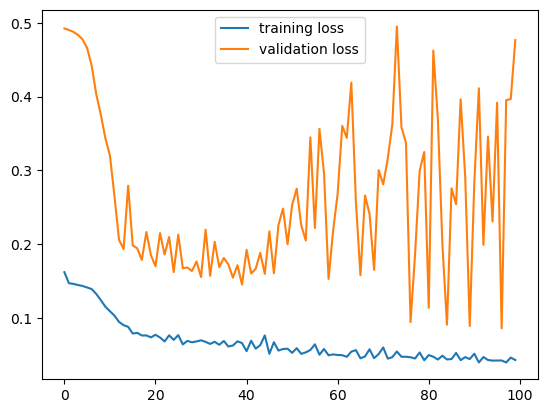

In [52]:
# Plotting the loss iteration
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()
# Note:
# if training loss >> validation loss -> Underfitting
# if training loss << validation loss -> Overfitting (i.e model is smart enough to have mapped the entire dataset..)
# Several ways to address overfitting:
# Reduce complexity of model (hidden layers, neurons, parameters input etc)
# Add dropout and tune rate
# More data :)

211/211 [==============================] - 1s 1ms/step


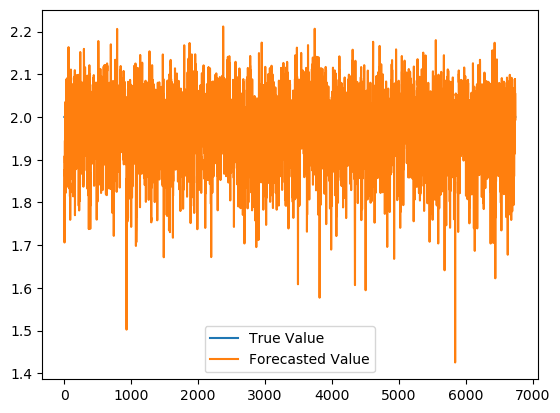

In [69]:
# This is a one step forecast (based on how we constructed our model)
y_pred = model.predict(testX)
plt.plot(testY, label = 'True Value')
plt.plot(y_pred, label = 'Forecasted Value')
plt.legend()

In [70]:
X

array([[[ 1.12796687, -0.8012927 , -0.2221855 , -0.26605176,
         -0.2398824 ,  0.18952351],
        [ 2.01006848,  0.55646839, -0.08101051, -0.18108716,
         -0.32896372, -0.30591246],
        [ 1.59622384,  0.25476042, -0.12678044, -0.09367341,
         -0.28264589, -0.26958798],
        ...,
        [ 1.83513784,  0.74158295, -0.16733946, -0.14142154,
         -0.28876974, -0.32488689],
        [ 1.17910078,  0.72022511,  0.02100484,  0.01284814,
         -0.22656683, -0.20795699],
        [ 2.16213451,  0.44921504, -0.16074486, -0.19724889,
         -0.35891643, -0.31011531]],

       [[ 2.01006848,  0.55646839, -0.08101051, -0.18108716,
         -0.32896372, -0.30591246],
        [ 1.59622384,  0.25476042, -0.12678044, -0.09367341,
         -0.28264589, -0.26958798],
        [ 1.83280827, -3.50184406, -0.45825801, -0.41474009,
         -0.42855934,  0.27701314],
        ...,
        [ 1.17910078,  0.72022511,  0.02100484,  0.01284814,
         -0.22656683, -0.20795699],
  

In [ ]:
# Predictions using the 'sliding/rolling window approach'
# Multi step forecast.
# Using self predictions for making future predictions
# Very much different from a univariate -- You will need predictions (or known) values for your independent values.
# Nonetheles, you will follow the same steps as shown for the univariate multi-step process.

In [71]:
len(X[threshold:])

6740